# Atividade Avaliativa - N02

Considere a empresa FabProd responsável por fabricar e distribuir uma família de produtos de limpeza de veículos para região Sul do Brasil. No entanto, o CEO dessa empresa não tem conhecimento do quanto a FabProd pode expandir a distribuição nessa região e nas demais regiões do Brasil.
O CEO tem apenas informações sobre as vendas oriundas do ERP, e está interessado em conhecer melhor as possibilidades de expansão dos negócios para a FabProd. Ele sabe que existe uma área multidisciplinar (ciência de dados) que pode ajudá-lo, mas ele não sabe como.

- Considerando esse cenário, faça uma demonstração utilizando **dados sintéticos** como um exemplo de um conjunto de possibilidades. Para esse cenário, inclua aspectos da **Análise Exploratória de Dados** e um modelo preditivo (disciplina AM).
- Por outro lado, esclareça que a FabProd precisa valorizar os dados que são gerados internamente e externamente da cadeia produtiva em que a FabProd está inserida (se precisar utilize a metodologia CRISP-DM).

### Criando os dados para analisarmos

Inicialmente precisamos criar dados que recebos do ERP para fazer nossa Análise Exploratória de Dados, para isso podemos rodar o arquivo `generate_data.py` que criará um arquivo `data.csv` com 1000 compras.

### Instalação e importação das bibliotecas necessárias

In [31]:
%pip install pandas matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 5.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 6.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [9]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['figure.figsize']  = (16, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

Agora com as bibliotecas instaladas, importadas e configuradas, podemos importar os dados e começar a analisá-los

In [10]:
df = pd.read_csv("./data.csv")
df.head()

,id,date_time,state,quantity,product,unit_price,total_price
0,99d57a23-39b4-487c-873e-87db98909521,03/23/2023 03:02:50,rio grande do sul,55,removedor de insetos,19.9,1094.5
1,e55a0b92-52a0-40ae-9c00-36d1c3880716,01/26/2023 16:47:26,rio grande do sul,8,polidor de metais automotivo,39.9,319.2
2,59312d86-dd98-405d-9ff5-c3bb3293e96f,02/04/2023 19:10:22,paraná,68,limpa-tapetes automotivo,34.9,2373.2
3,84acdcec-c58c-42f5-9a3f-0388b472bc07,03/27/2023 13:14:36,rio grande do sul,17,removedor de insetos,19.9,338.3
4,eaff696f-edea-4877-970e-ee2f288d48fb,03/15/2023 14:52:17,rio grande do sul,34,cera automotiva,39.9,1356.6


Agora com o dataframe carregado podemos começar a analisar os dados.

### Vendas por mês

Levando em consideração que esse dataset só contém os dados do primeiro quadrimestre de 2023, vamos primeiro analisar a quantidade de vendas por mês por meio de um gráfico de barras.

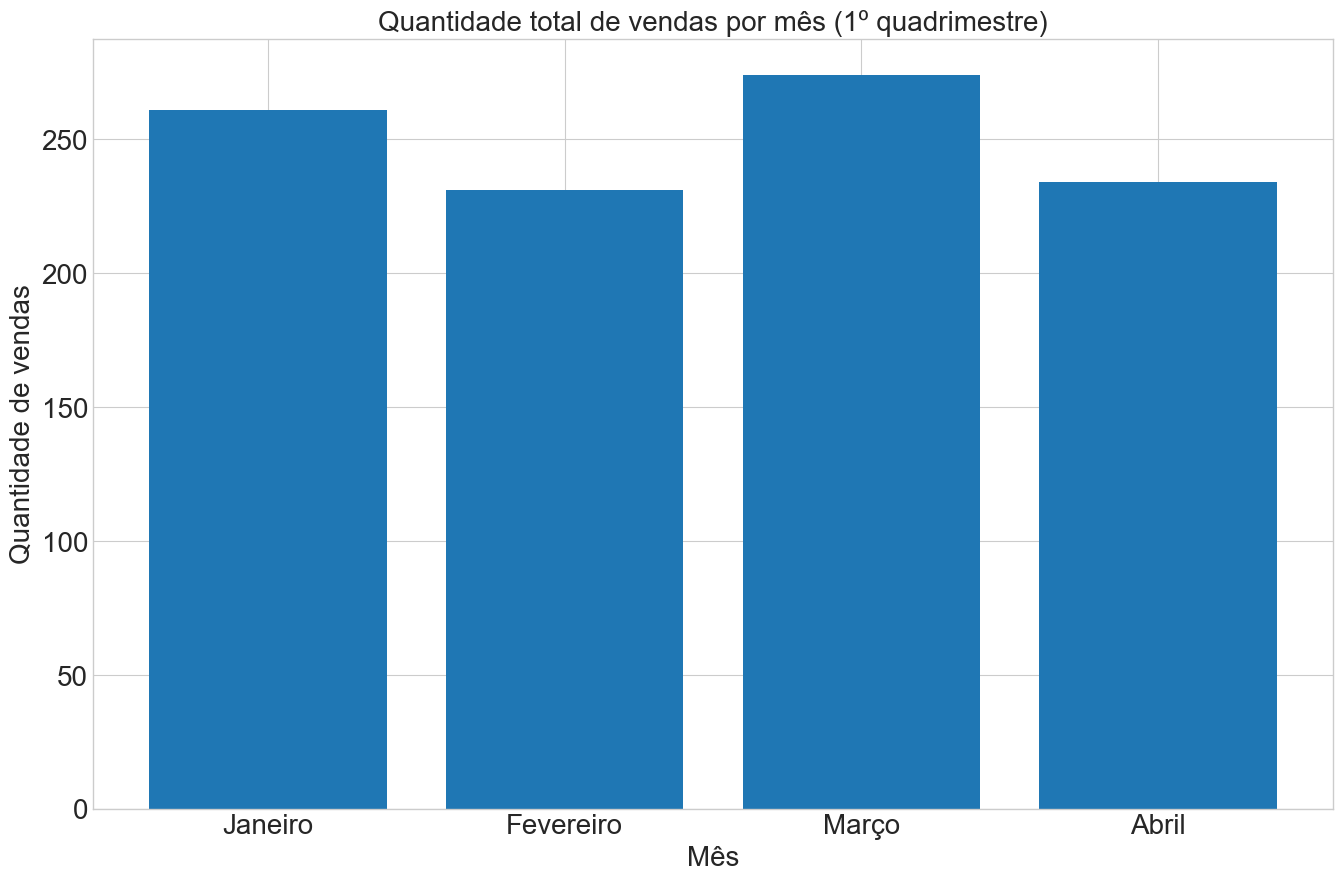

In [11]:
df["month"] = pd.to_datetime(df["date_time"]).dt.month
sales_by_month = df.groupby("month").size()

plt.bar(sales_by_month.index, sales_by_month.values)
plt.title("Quantidade total de vendas por mês (1º quadrimestre)")
plt.xlabel("Mês")
plt.ylabel("Quantidade de vendas")
plt.xticks(sales_by_month.index, ["Janeiro", "Fevereiro", "Março", "Abril"])
plt.show()

Analisando o gráfico acima, podemos notas que as vendas de todos os meses foram bem semelhantes, sendo o mês com mais vendas o de março e o com menos o de fevereiro.

Agora vamos analisar separar também pelos produtos.

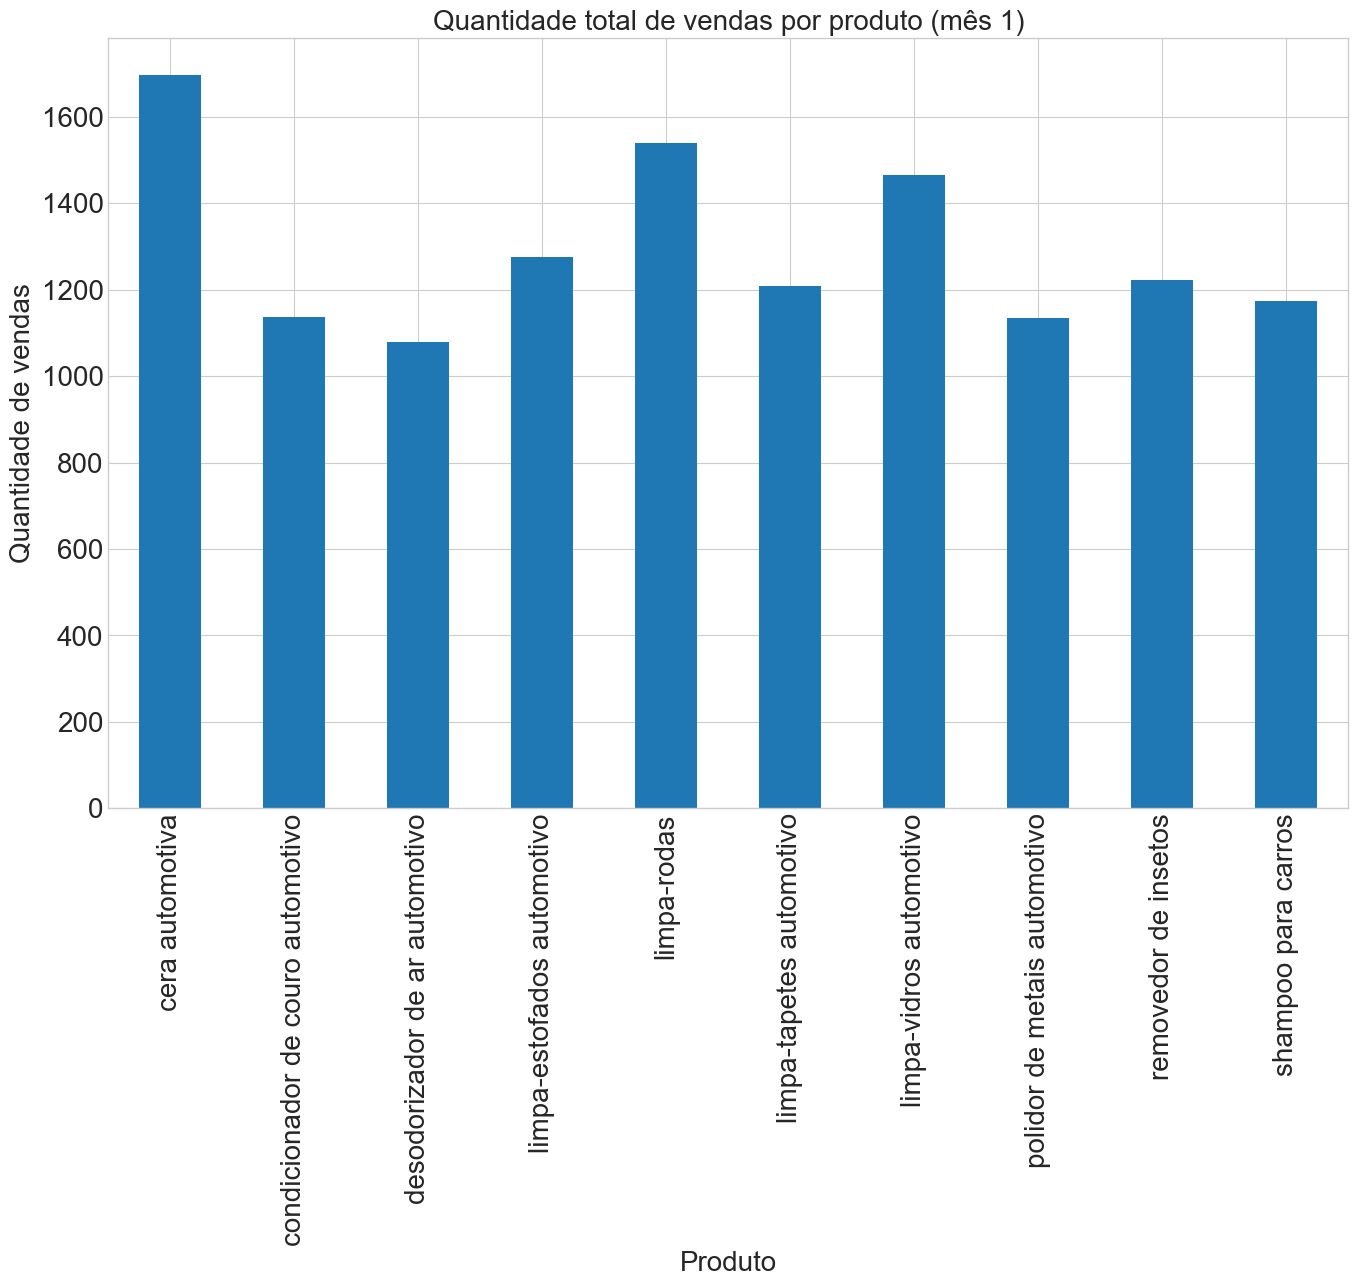

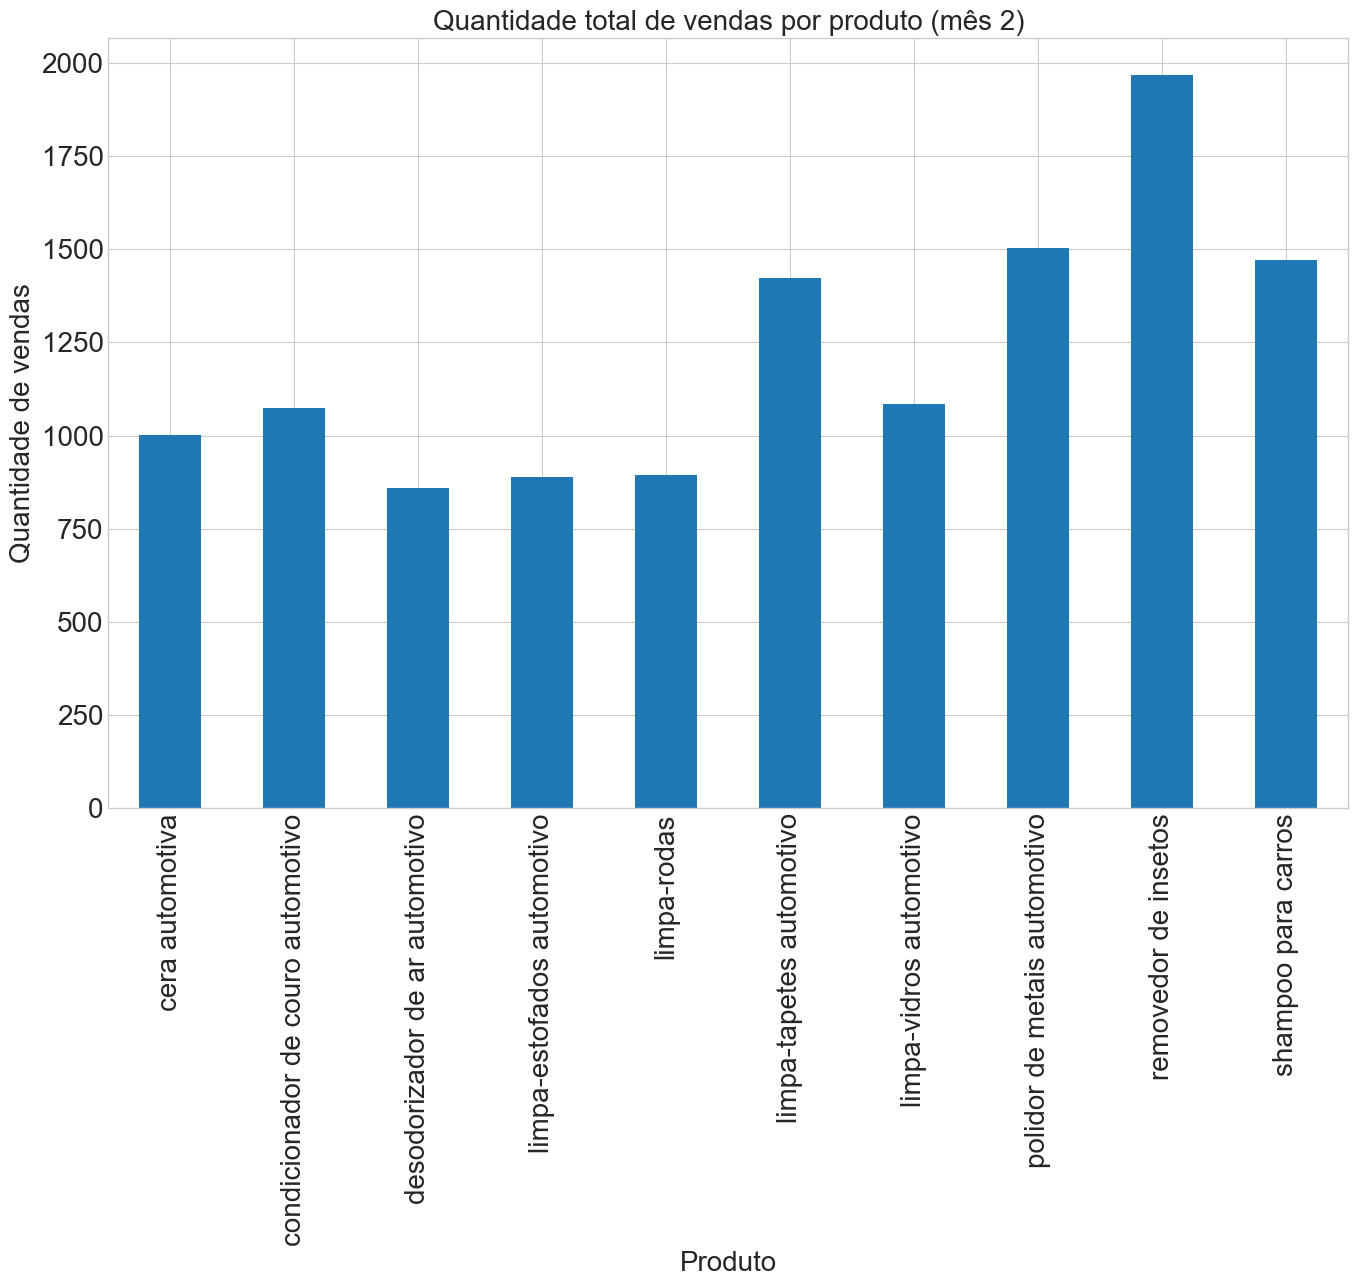

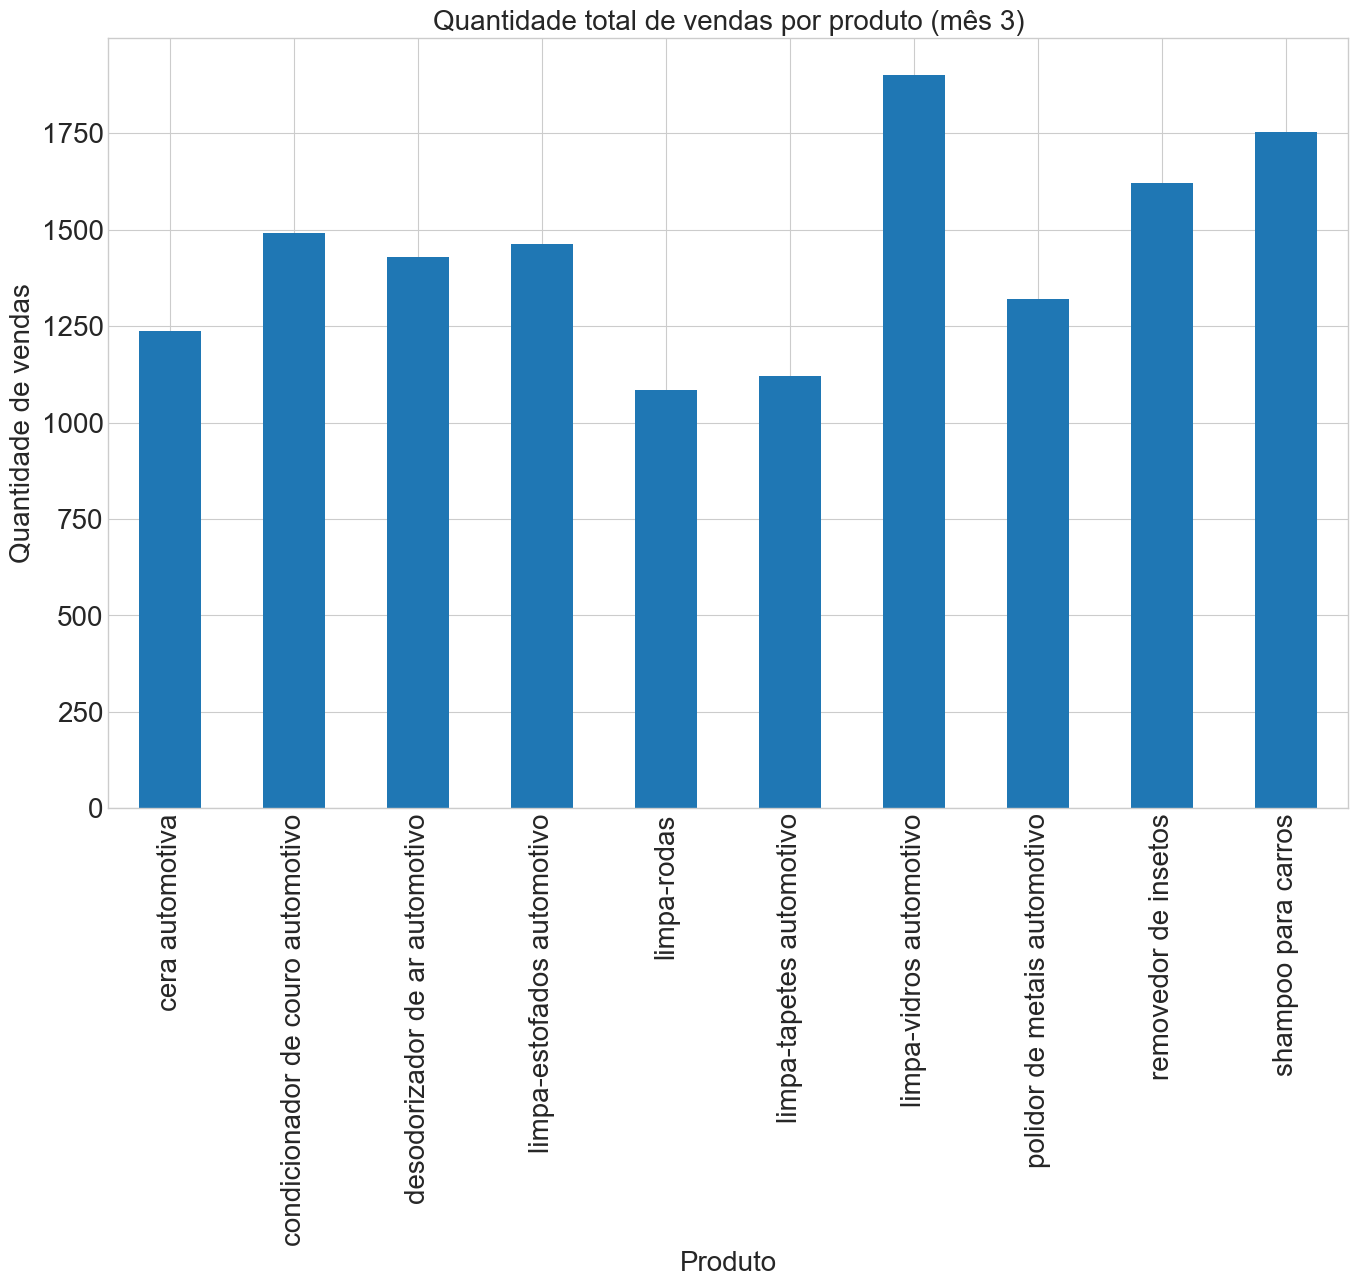

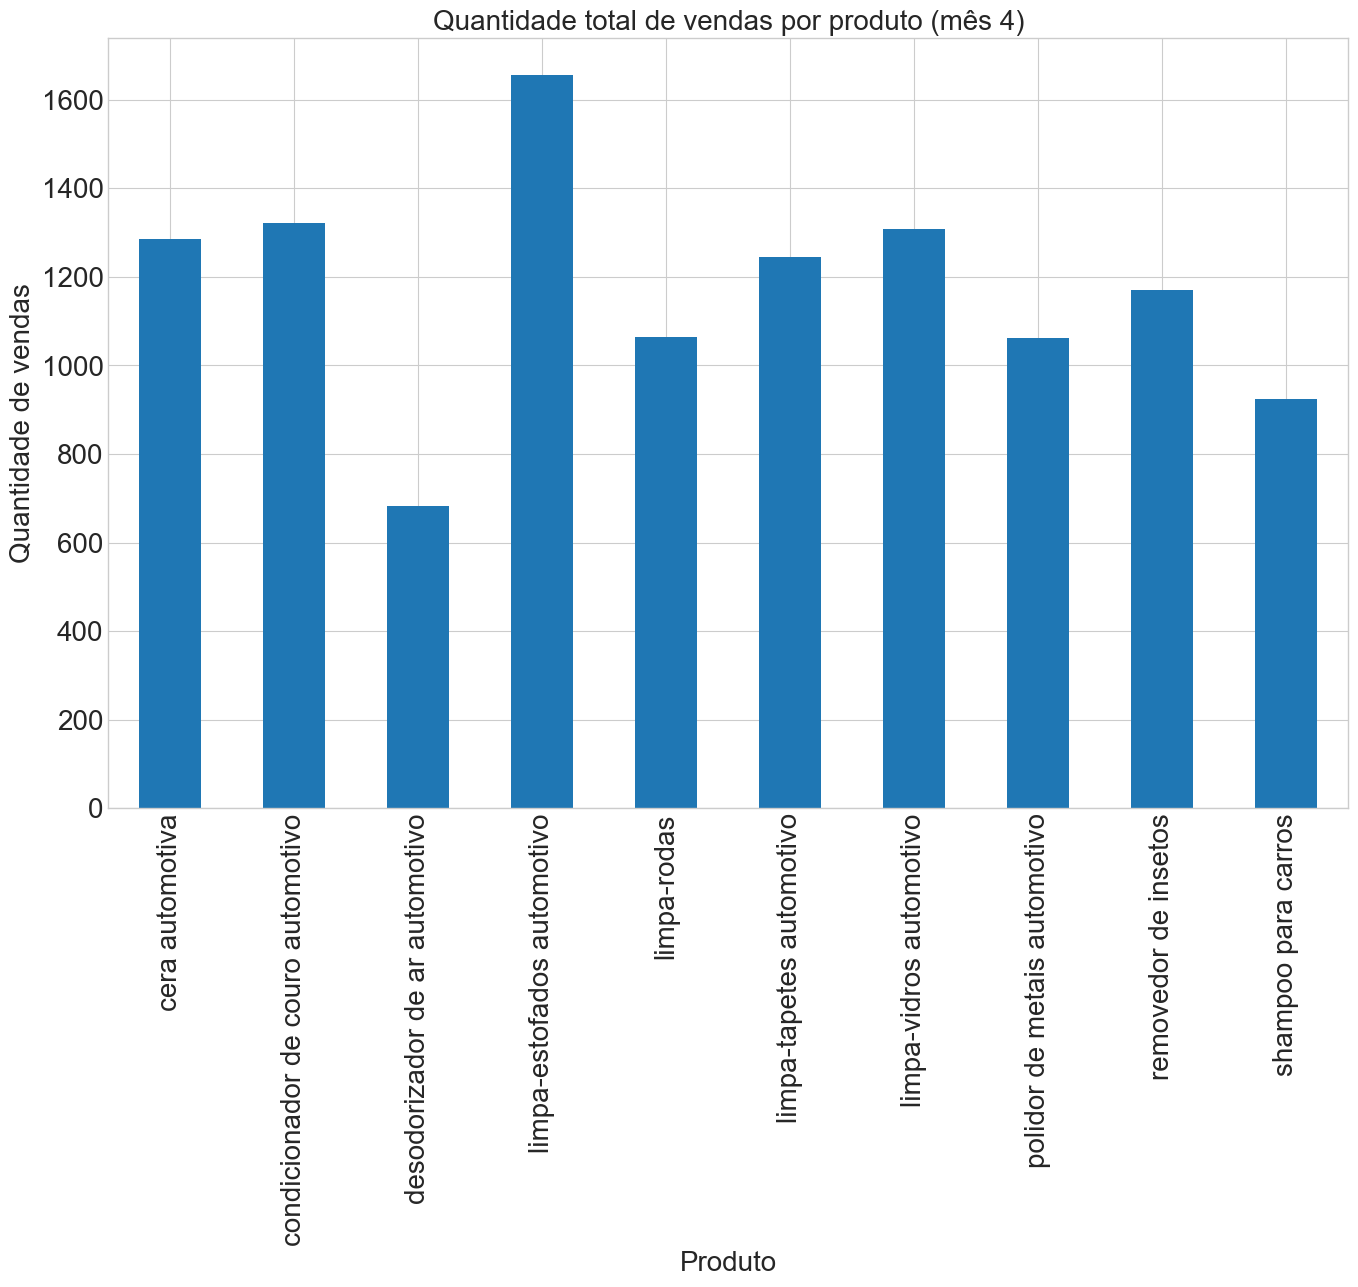

In [12]:
for month in [1, 2, 3, 4]:
    df_month = df.loc[df["month"] == month]

    total_sales = df_month.groupby("product")["quantity"].sum()
    total_sales.plot.bar()
    plt.title('Quantidade total de vendas por produto (mês {})'.format(month))
    plt.xlabel('Produto')
    plt.ylabel('Quantidade de vendas')
    plt.show()

Analisando os gráficos acima podemos concluir que o produto mais vendido varia a cada mês,porém o menos vendido é o mesmo em janeiro, fevereiro e abril.
Sendo o mais e o menos vendido por mês:


|               | Mais vendido               | Menos vendido                  |
|---------------|----------------------------|--------------------------------|
| **Janeiro**   | cera automotiva            | desodorizador de ar automotivo |
| **Fevereiro** | removedor de insetos       | desodorizador de ar automotivo |
| **Março**     | limpa-vidros automotivo    | limpa-rodas                    |
| **Abril**     | limpa-estofados automotivo | desodorizador de ar automotivo |

Agora vamos ver as vendas por estados.

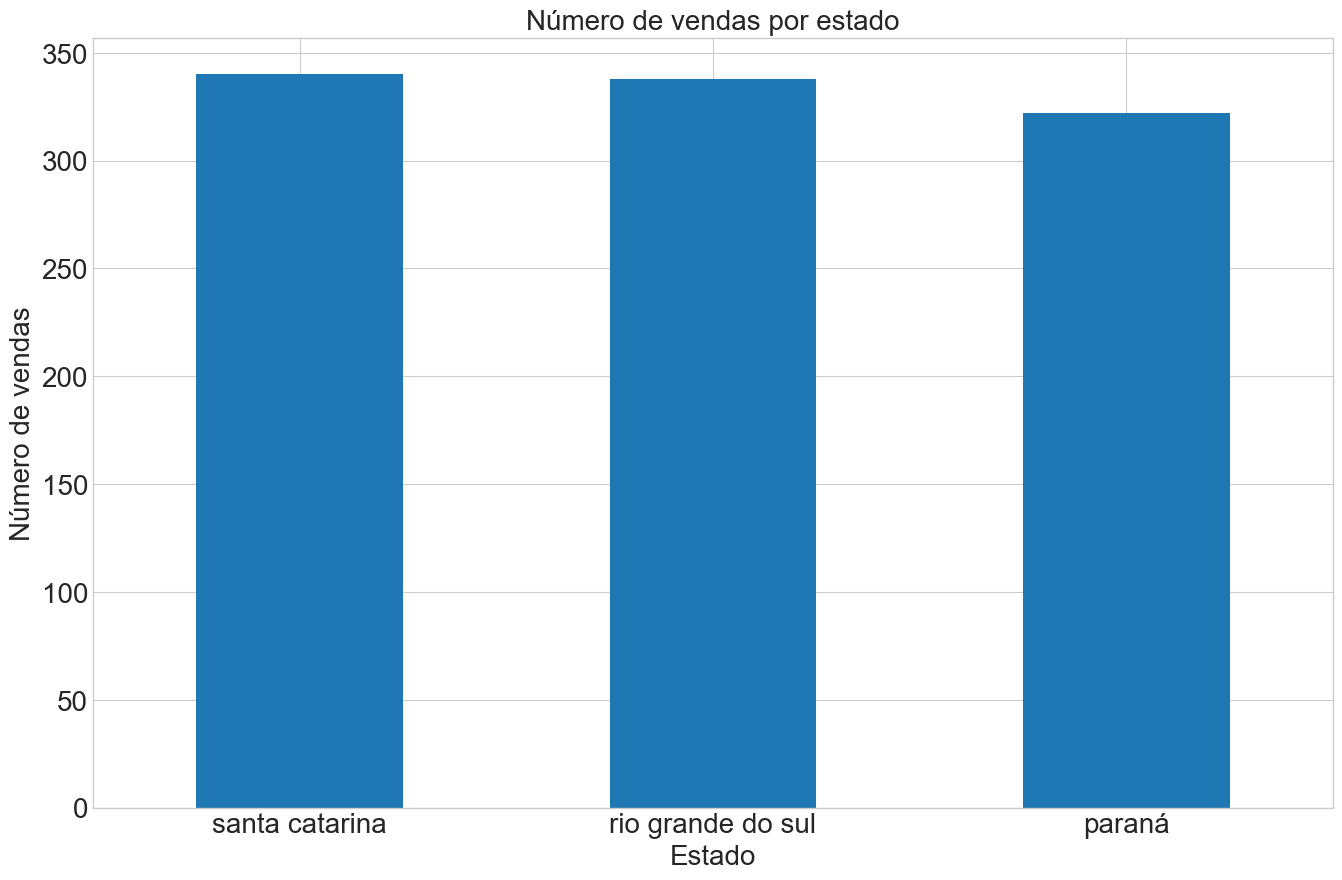

In [13]:
state_count = df["state"].value_counts()
state_count.plot.bar()

plt.title('Número de vendas por estado')
plt.xlabel('Estado')
plt.ylabel('Número de vendas')
plt.xticks(rotation=0)
plt.show()

Podemos concluir com esse gráfico que Santa Catarina e Rio Grande do Sul tem um número de vendas quase igual, porém o Paraná está um pouco abaixo dos dois, mas será que SC e RS teve a mesma receita? Para isso podemos gerar um gráfico com a receita total por estado.

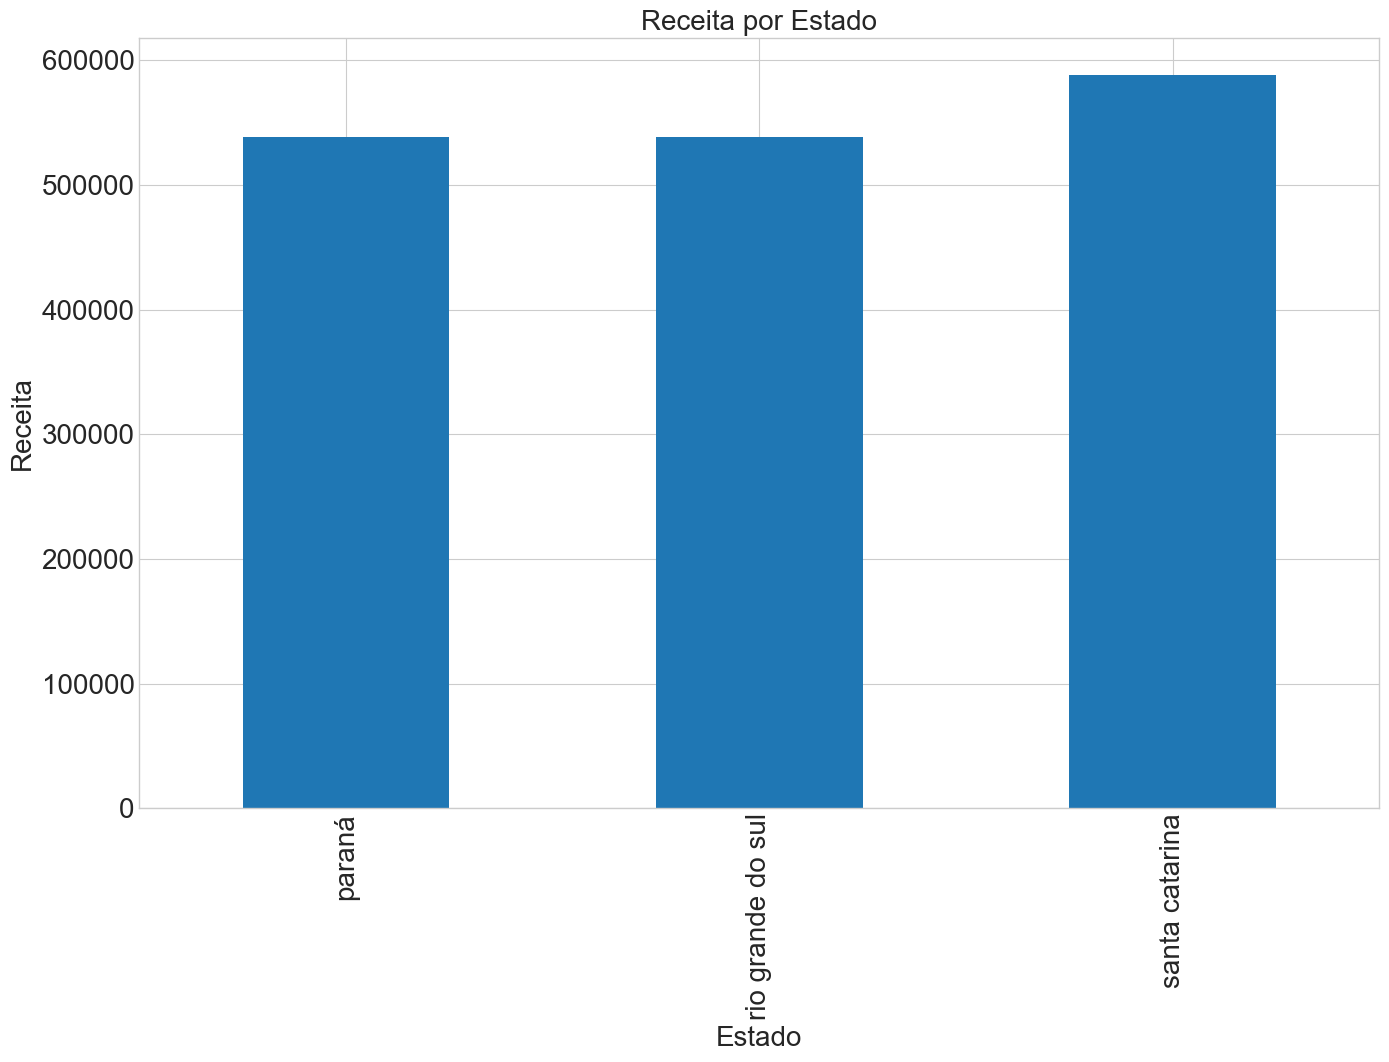

In [15]:
df_state = df.groupby('state')['total_price'].sum()

df_state.plot(kind='bar')
plt.title('Receita por Estado')
plt.xlabel('Estado')
plt.ylabel('Receita')
plt.show()

Podemos analisar que por mais que RS e SC venderam a mesma quantidade de produtos, a receita do RS foi mais parelha com a do PR. Levando em consideração que queremos uma receita minima de R$1.000.000 por estado no próximo quadrimestre, vamos montar um modelo preditivo para determinar quanto precisamos vender em cada estado.

## Análise Preditiva

Inicialmente precisamos transformar nossos dados da coluna `state` e `product` em dummies para que possamos utilizar em nosso modelo.

E em seguida criar o conjunto de treinamento e teste.

In [37]:
# Transforma a variável categórica "state" e "product" em variáveis dummies
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['state', 'product'])], remainder='passthrough')
X = ct.fit_transform(df[['state', 'product', 'quantity']])

# Separa o conjunto de dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(
    X, df['total_price'], test_size=0.2, random_state=42)

Agora podemos construir o modelo de regressão linear múltipla e treiná-lo no conjunto de treinamento:

In [38]:
# Cria o modelo de regressão linear múltipla
model = LinearRegression()

# Treina o modelo no conjunto de treinamento
model.fit(x_train, y_train)

LinearRegression()

Com o modelo treinado, podemos fazer previsões para o conjunto de teste

In [42]:
# Faz previsões para o conjunto de teste
y_pred = model.predict(x_test)

y_pred

array([1329.98158292, 1919.05360362,  722.50607033, 1925.04560177,
        637.70315228, 2603.07582117, 1083.76862744, 2154.13512137,
       2635.48524571, 3960.43242729, 2410.54174371, 2052.94922226,
        646.78680815, 3381.01236404, 2084.4482606 , 1232.73891531,
       1144.6081594 , 1232.73891531, 1481.10122983, 1567.77195778,
       3079.83083277, 1253.57338046, 1589.32361903, 2116.31763938,
       3327.07473608, 2661.17471459, 2485.31383683, 1538.98208929,
       2107.92292378,  560.43495765, 2829.25818283, 2084.4434626 ,
       2283.81205737, 2210.06441035, 3370.84163949,  637.70315228,
       3068.68093799, 2764.42973775, 1524.49517396,  690.0918478 ,
       1636.2247569 , 2405.26694166, 1432.84026558, -476.10296739,
       1881.02336603, 3424.77926745, 1665.01462539, 2248.47063103,
       1079.60736199, 2140.36540214, -573.345635  , 1265.15313785,
       2062.92005718, 2090.0238724 , 3294.66051354, 2680.42746366,
       2399.13215951, 2398.96198633, 1205.22351173, 3792.22653

E por último, podemos avaliar nossa performance do modelo no conjunto de teste. Uma métrica comum para avaliar modelos de regressão é o coeficiente de determinação (R²). Quanto mais próximo de 1, melhor o modelo.

In [41]:
# Avalia a performance do modelo no conjunto de teste
r2 = model.score(x_test, y_test)
print(f"R²: {r2:.3f}")

R²: 0.913
